In [1]:
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt
import re
import requests
import json
import seaborn

# QUESTION 1 

## FIRST SUBPART 

# NUMBER OF RESTAURANTS IN INDIA VS DELHI NCR

In [2]:
r = pd.read_csv('zomato.csv' , encoding = 'ISO-8859-1')

In [3]:
##y axis - no of restaurants
##x axis - The places.

TotalCities = r[r['Country Code'] == 1]
type(TotalCities)

pandas.core.frame.DataFrame

In [4]:
li = TotalCities[TotalCities.City == TotalCities.City]
# print(li)
# x = li.value_counts()
# print(x)
##The five cities included for calulating Delhi NCR 
# New Delhi       5473
# Gurgaon         1118
# Noida           1080
# Faridabad        251
# Ghaziabad         25
# s = li[li['']]

In [5]:
newDelhi = li['City'] == 'New Delhi'
print(newDelhi.sum())

5473


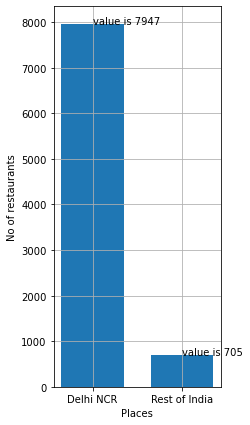

In [49]:
gurgaon = li['City'] == 'Gurgaon'
Noida = li['City'] == 'Noida'
faridabad = li['City'] == 'Faridabad'
ghaziabad = li['City'] == 'Ghaziabad'
x = ['Delhi NCR' , 'Rest of India']
sum = newDelhi.sum() + gurgaon.sum() + faridabad.sum() + ghaziabad.sum() + Noida.sum()
width = [0.7, 0.7]
space = [1,1]
s = int(li.describe()['Country Code']['count']) - sum
y = [sum , s]
plt.figure(figsize = (3,7))
linewidth = [22]
plt.bar(x,y,width = width , align = 'center')
for index , value in enumerate(y):
    plt.text(index  , value  ,'value is ' + str(value))
plt.xlabel("Places")
plt.ylabel("No of restaurants")
plt.grid()
plt.show()

## FIRST SUBPART ENDS HERE. 

## SECOND SUBPART 

# FINDING CUISINES PRESENT IN REST OF INDIA BUT NOT IN DELHI NCR 

In [7]:
##Country code of India is 1
TotalCities = r[r['Country Code'] == 1]
type(TotalCities)

pandas.core.frame.DataFrame

In [ ]:
li = TotalCities[TotalCities.City == TotalCities.City]
# print(li['Cuisines'].value_counts())
#     print(i.values())
print(type(li))

RestOfIndia = li[(li.City != 'Gurgaon') & (li.City != 'New Delhi') & (li.City != 'Noida') & (li.City != 'Faridabad') & (li.City != 'Ghaziabad')]
print(RestOfIndia)


In [9]:
newdelhi = li[li.City == 'New Delhi']
gurgaon = li[li.City == 'Gurgaon']
Noida = li[li.City == 'Noida']
faridabad = li[li.City == 'Faridabad']
ghaziabad = li[li.City == 'Ghaziabad']

In [10]:
DelhiNcr = pd.concat([newdelhi , gurgaon , Noida , faridabad , ghaziabad] , ignore_index = True, verify_integrity = True)

In [ ]:
print(DelhiNcr)

In [ ]:
x = DelhiNcr.Cuisines.unique()
print(len(x))
print(type(x))
print(type(x[1]))
for i in x:
    print(i)

In [ ]:
CuisineDelhi = []
for i in x:
    temp = i.strip().split(', ')
    for j in temp:
        if j not in CuisineDelhi:
            CuisineDelhi.append(j)
# print(len(l))
print(len(CuisineDelhi))
for i in CuisineDelhi:
    print(i)

In [ ]:
print(len(RestOfIndia))

In [ ]:
tt = RestOfIndia.Cuisines.unique()
print(len(tt))

In [ ]:
CuisineRest = []
for i in tt:
    temp = i.strip().split(', ')
    for j in temp:
        if j not in CuisineRest:
            CuisineRest.append(j)
print(len(CuisineRest))
for i in CuisineRest:
    print(i)

In [ ]:
CuisineCommon = list(set(CuisineDelhi) & set(CuisineRest))
# print(CuisineCommon)
for i in CuisineCommon:
    print(i)
print(len(CuisineCommon))

In [18]:
ActualRest = []
for i in CuisineRest:
    if i not in CuisineCommon:
        ActualRest.append(i)
for i in ActualRest:
    print(i)
print(len(ActualRest))
# print(CuisineCommon)



German
Malwani
BBQ
Cajun
4


In [47]:
h = {'user-key':'560ea803b6cff3554098333487ab98bb'}
data = {'city_id':1 , 'lat' : 28.632832 , 'lon' : 77.219688}
basic_api = 'https://developers.zomato.com/api/v2.1'

r = requests.get(basic_api + '/cuisines' , headers = h , params = data)
# print(r)
p = r.json()
german = False
cajun = False
malwan = False
bbq = False
for i in p['cuisines']:
    if i['cuisine']['cuisine_name'] == 'German':
        german = True
        break
for i in p['cuisines']:
    if i['cuisine']['cuisine_name'] == 'cajun':
        cajun = True
        break
for i in p['cuisines']:
    if i['cuisine']['cuisine_name'] == 'Malwani':
        malwan = True
        break
for i in p['cuisines']:
    if i['cuisine']['cuisine_name'] == 'BBQ':
        bbq = True
        break
if german == True:
    print("german present")
else:
    print("german absent")
if cajun == True:
    print("cajun present")
else:
    print("cajun absent")
if malwan == True:
    print("Malwani present")
else:
    print("Malwani absent")
if bbq == True:
    print("BBQ present")
else:
    print("BBQ absent")

german absent
cajun absent
Malwani present
BBQ present


In [19]:
# The cuisines 'German' and 'cajun' were actually not found in the restaurants of Delhi NCR in 
# zomato API.However , the cuisines 'Malwani' and 'BBQ' were found to have been served in the 
# restaurants of Delhi NCR in zomato API.

## SECOND SUBPART ENDS HERE. 

## THIRD SUBPART  

# TOP 10 CUISINES SERVED BY DELHI NCR AND REST OF INDIA  

# TOP 10 DELHI NCR 

In [20]:
CuiDelc = {}
x = list(DelhiNcr.Cuisines)
for i in x:
    temp = i.strip().split(', ')
    for j in temp:
        if j not in CuiDelc:
            CuiDelc[j] = 1
        else:
            CuiDelc[j] += 1
# for i in CuiDelc:
#     print(i , CuiDelc[i])
# print(len(CuiDelc))
ld = []
count = 0
sorted_dictd = {}
sorted_keys = sorted(CuiDelc , key = CuiDelc.get , reverse = True)
for i in sorted_keys:
    sorted_dictd[i] = CuiDelc[i]
for i in sorted_dictd:
    ld.append([i , sorted_dictd[i]])
    count += 1
    if count == 10:
        break
for i in ld:
    print(i)


# print(sorted_dictd)

['North Indian', 3597]
['Chinese', 2448]
['Fast Food', 1866]
['Mughlai', 933]
['Bakery', 697]
['South Indian', 569]
['Continental', 547]
['Desserts', 542]
['Street Food', 538]
['Italian', 535]


# TOP 10 REST OF INDIA  

In [21]:
Cuisinerc = {}
ls = list(RestOfIndia.Cuisines)
for i in ls:
    temp = i.strip().split(', ')
    for j in temp:
        if j not in Cuisinerc:
            Cuisinerc[j] = 1
        else:
            Cuisinerc[j] += 1
# for i in Cuisinerc:
#     print(i , Cuisinerc[i])
# print(len(Cuisinerc))
ls = []
count = 0
sorted_dicts = {}
sorted_keys = sorted(Cuisinerc , key = Cuisinerc.get , reverse = True)
for i in sorted_keys:
    sorted_dicts[i] = Cuisinerc[i]
for i in sorted_dicts:
    ls.append([i , sorted_dicts[i]])
    count += 1 
    if count == 10:
        break
for i in ls:
    print(i)


['North Indian', 349]
['Chinese', 242]
['Continental', 177]
['Italian', 147]
['Cafe', 136]
['Fast Food', 97]
['South Indian', 62]
['Mughlai', 59]
['Desserts', 55]
['Mexican', 50]


## THIRD SUBPART ENDS HERE.

## FOURTH SUB PART

## SIMILARITIES: 

In [1]:
# It has been observed that The cuisines 'North Indian' and 'Chinese' are the top two cuisines 
# in DelhiNCR and rest of India . With Delhi NCR having 3597 outlets of north indian cuisine
# and 2448 outlets serving chinese cuisine . The cuisine 'South Indian' shares a place in top 10
# in both the places , just the difference is in the positioning . South Indian cuisine is at the
# sixth place in Delhi Ncr with 569 outlets while at the seventh place in rest of India with 62 outlets.

## DIFFERENCES: 

In [23]:
# The cuisines of baker in Delhi Ncr which grabs the fifth position is absent in the restaurants
# across India.Street food cuisine as well is absent in cuisines not in delhi ncr.
# The Italian cuisine in Delhi NCR grabs the 10th position while it is absent in rest of India

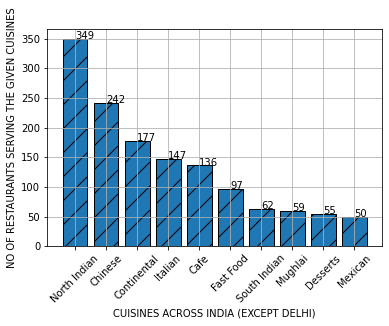

In [56]:
##Rest of India
x1 = []
y1 = []
for i in ls:
    x1.append(i[0])
    y1.append(i[1])
plt.bar(x1 , y1 , hatch = '/',edgecolor = 'black')
plt.xlabel('CUISINES ACROSS INDIA (EXCEPT DELHI)')
plt.ylabel('NO OF RESTAURANTS SERVING THE GIVEN CUISINES')
plt.xticks(rotation = 45)
plt.grid()
for index , value in enumerate(y1):
    plt.text(index  , value  , str(value))
plt.show()

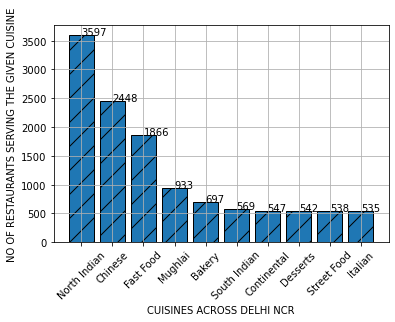

In [53]:
##Delhi ncr
x = []
y = []
for i in ld:
    x.append(i[0])
    y.append(i[1])
plt.bar(x,y , hatch = '/' ,edgecolor = 'black')
plt.xlabel('CUISINES ACROSS DELHI NCR')
plt.ylabel('NO OF RESTAURANTS SERVING THE GIVEN CUISINE')
plt.xticks(rotation = 45)
for index , value in enumerate(y):
    plt.text(index  , value  , str(value))
plt.grid()
plt.show()

## FOURTH SUBPART ENDS HERE. 